# 데이터 분석 프로젝트

In [1]:
# pip install numpy pandas matplotlib folium beautifulsoup4 selenium lxml seaborn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import folium
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import random
from datetime import datetime
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [4]:
"""
강원도 신재생에너지 분석 프로젝트 - 마스터 파이프라인
전체 데이터 수집, 전처리, 통합 프로세스를 한 번에 실행
"""

import os
import sys
from datetime import datetime
import argparse


class MasterPipeline:
    """마스터 파이프라인 클래스"""
    
    def __init__(self):
        self.start_time = datetime.now()
        self.log_file = f"pipeline_log_{self.start_time.strftime('%Y%m%d_%H%M%S')}.txt"
        
    def log(self, message):
        """로그 기록"""
        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
        log_msg = f"[{timestamp}] {message}"
        print(log_msg)
        
        with open(self.log_file, 'a', encoding='utf-8') as f:
            f.write(log_msg + '\n')
    
    def print_header(self, title):
        """섹션 헤더 출력"""
        border = "=" * 70
        self.log(f"\n{border}")
        self.log(f"{title:^70}")
        self.log(f"{border}\n")
    
    def run_data_collection(self, use_sample=True):
        """
        1단계: 데이터 수집
        """
        self.print_header("STEP 1: 데이터 수집")
        
        if use_sample:
            self.log("샘플 데이터 모드로 실행합니다.")
            self.log("실제 데이터 수집을 원하시면 --real-data 옵션을 사용하세요.\n")
            
            # 샘플 데이터 생성 (통합 스크립트에서 처리)
            self.log("✓ 샘플 데이터는 통합 단계에서 생성됩니다.")
            
        else:
            self.log("⚠ 실제 데이터 수집을 위해서는:")
            self.log("1. 한국에너지공단에서 엑셀 파일 다운로드")
            self.log("2. 기상청 API 키 발급 및 설정")
            self.log("3. 공공데이터포털 API 키 발급")
            self.log("\n상세 내용은 README.md를 참조하세요.")
        
        return True
    
    def run_preprocessing(self):
        """
        2단계: 데이터 전처리
        """
        self.print_header("STEP 2: 데이터 전처리")
        
        # 전처리할 파일이 있는지 확인
        raw_files = []
        if os.path.exists('data/raw'):
            raw_files = [f for f in os.listdir('data/raw') if f.endswith('.csv')]
        
        if raw_files:
            self.log(f"전처리할 파일: {len(raw_files)}개")
            for f in raw_files:
                self.log(f"  - {f}")
            
            self.log("\n전처리 시작...")
            # 실제 전처리는 별도 모듈에서 수행
            self.log("✓ 전처리는 통합 단계에서 함께 처리됩니다.")
        else:
            self.log("⚠ data/raw/ 폴더에 파일이 없습니다.")
            self.log("샘플 데이터로 진행합니다.")
        
        return True
    
    def run_integration(self):
        """
        3단계: 데이터 통합
        """
        self.print_header("STEP 3: 데이터 통합")
        
        try:
            # 실제로는 별도 모듈 import
            self.log("통합 스크립트 실행 중...")
            self.log("✓ 데이터 통합 준비 완료")
            self.log("\n실제 실행은 다음 명령어로:")
            self.log("  python scripts/data_integration.py")
            
            return True
        except Exception as e:
            self.log(f"✗ 오류 발생: {e}")
            return False
    
    def check_environment(self):
        """
        환경 체크
        """
        self.print_header("환경 확인")
        
        # Python 버전 확인
        python_version = sys.version.split()[0]
        self.log(f"Python 버전: {python_version}")
        
        # 필요한 라이브러리 확인
        required_packages = {
            'pandas': 'pandas',
            'numpy': 'numpy',
            'requests': 'requests',
            'beautifulsoup4': 'bs4'
        }
        
        missing_packages = []
        
        for package_name, import_name in required_packages.items():
            try:
                __import__(import_name)
                self.log(f"✓ {package_name}")
            except ImportError:
                self.log(f"✗ {package_name} - 설치 필요")
                missing_packages.append(package_name)
        
        if missing_packages:
            self.log(f"\n설치 명령어:")
            self.log(f"pip install {' '.join(missing_packages)}")
            return False
        
        # 디렉토리 구조 확인
        self.log("\n디렉토리 구조 확인:")
        directories = ['data/raw', 'data/processed', 'scripts', 'notebooks', 'docs']
        
        for directory in directories:
            if os.path.exists(directory):
                self.log(f"✓ {directory}/")
            else:
                self.log(f"✗ {directory}/ - 생성 필요")
                os.makedirs(directory, exist_ok=True)
                self.log(f"  → 생성 완료: {directory}/")
        
        return True
    
    def create_project_structure(self):
        """
        프로젝트 폴더 구조 생성
        """
        self.print_header("프로젝트 구조 생성")
        
        structure = {
            'data': ['raw', 'processed', 'policy'],
            'scripts': ['crawling', 'preprocessing'],
            'notebooks': [],
            'docs': [],
            'results': ['figures', 'tables']
        }
        
        for parent, subdirs in structure.items():
            os.makedirs(parent, exist_ok=True)
            self.log(f"✓ {parent}/")
            
            for subdir in subdirs:
                path = os.path.join(parent, subdir)
                os.makedirs(path, exist_ok=True)
                self.log(f"  ✓ {path}/")
        
        # README 파일 생성
        self.create_readme()
        
        return True
    
    def create_readme(self):
        """
        README.md 생성
        """
        readme_content = """# 강원도 신재생에너지 분석 프로젝트

## 프로젝트 개요
강원도 RE100 및 그린 뉴딜 정책 기반 신재생 에너지 산업 분석

## 팀원
- 천예리: 정책 자료 정리, 분석 설계, 결과 해석
- 김정현: 데이터 수집 자동화, 전처리, 시각화

## 프로젝트 구조
```
KDT-RE-DataAnalysis/
├── data/
│   ├── raw/              # 원본 데이터
│   ├── processed/        # 전처리된 데이터
│   └── policy/           # 정책 자료
├── scripts/
│   ├── crawling/         # 크롤링 스크립트
│   └── preprocessing/    # 전처리 스크립트
├── notebooks/            # 분석용 Jupyter Notebook
├── docs/                 # 문서
├── results/              # 분석 결과
│   ├── figures/          # 그래프/차트
│   └── tables/           # 통계 테이블
└── README.md
```

## 설치 방법

### 1. 가상환경 생성 (권장)
```bash
python -m venv venv
source venv/bin/activate  # Windows: venv\\Scripts\\activate
```

### 2. 필요 라이브러리 설치
```bash
pip install pandas numpy matplotlib seaborn
pip install requests beautifulsoup4 selenium
pip install folium jupyter
```

## 실행 방법

### 전체 파이프라인 실행 (샘플 데이터)
```bash
python run_pipeline.py --sample
```

### 실제 데이터로 실행
```bash
python run_pipeline.py --real-data
```

### 단계별 실행
```bash
# 1. 데이터 수집
python scripts/renewable_energy_crawler.py

# 2. 기상 데이터 수집
python scripts/weather_data_crawler.py

# 3. 데이터 전처리
python scripts/data_preprocessing.py

# 4. 데이터 통합
python scripts/data_integration.py
```

## 데이터 소스

### 신재생에너지 발전량
- **출처**: 한국에너지공단 신재생에너지센터
- **URL**: https://www.knrec.or.kr/biz/pds/statistic/list.do
- **내용**: 지역별/에너지원별 발전량, 설비용량

### 기상 데이터
- **출처**: 기상청 기상자료개방포털
- **URL**: https://data.kma.go.kr
- **내용**: 일사량, 풍속, 강수량, 기온
- **참고**: API 키 발급 필요

### 정책 및 예산
- **출처**: 강원특별자치도청
- **URL**: https://state.gwd.go.kr/portal
- **내용**: 그린뉴딜 예산, RE100 정책

## 분석 목표

### 핵심 분석 질문
1. 기후 요인은 강원도 신재생에너지 발전량에 얼마나 영향을 미치는가?
2. 정책 예산 투입 전후 발전량 변화는 통계적으로 유의미한가?
3. 강원도는 타 시도 대비 RE100 산업 입지로서 어떤 강약점을 가지는가?

### 분석 방법
- 상관관계 분석
- 시계열 분석
- 회귀 모델
- 시각화 및 지도 매핑

## Git Commit 규칙

### Conventional Commits 사용
- `feat:` 새로운 기능 추가
- `fix:` 버그 수정
- `docs:` 문서 수정
- `style:` 코드 스타일 변경
- `refactor:` 코드 리팩토링

### 예시
```bash
git commit -m "feat: 강원도 발전량 시계열 분석 추가"
git commit -m "fix: 연도별 발전량 집계 오류 수정"
```

## 일정

- **1단계** (12.15~12.17): 주제 선정, 계획 수립
- **2단계** (12.17~12.24): 데이터 수집 및 전처리
- **3단계** (12.24~01.07): 데이터 분석 및 시각화
- **4단계** (01.07~01.12): 결과 검증 및 보고서 작성
- **최종** (01.13): 결과 발표

## 문의사항
- GitHub Issues 활용
- Slack 채널: #kdt-re-analysis

## 라이선스
MIT License
"""
        
        with open('README.md', 'w', encoding='utf-8') as f:
            f.write(readme_content)
        
        self.log("✓ README.md 생성 완료")
    
    def print_summary(self):
        """
        실행 요약 출력
        """
        self.print_header("실행 완료 요약")
        
        elapsed_time = datetime.now() - self.start_time
        
        self.log(f"총 실행 시간: {elapsed_time.total_seconds():.2f}초")
        self.log(f"로그 파일: {self.log_file}")
        
        self.log("\n다음 단계:")
        self.log("1. data/ 폴더에서 데이터 확인")
        self.log("2. notebooks/ 에서 Jupyter Notebook으로 탐색적 분석 시작")
        self.log("3. 시각화 및 인사이트 도출")
        
        self.log("\n유용한 명령어:")
        self.log("  jupyter notebook  # Notebook 실행")
        self.log("  python -m http.server 8000  # 결과물 웹 서버로 확인")
    
    def run(self, use_sample=True):
        """
        전체 파이프라인 실행
        """
        self.print_header("강원도 신재생에너지 분석 프로젝트")
        self.log("파이프라인 시작\n")
        
        # 환경 체크
        if not self.check_environment():
            self.log("\n⚠ 환경 설정이 완료되지 않았습니다.")
            return False
        
        # 프로젝트 구조 생성
        self.create_project_structure()
        
        # 1. 데이터 수집
        if not self.run_data_collection(use_sample):
            return False
        
        # 2. 데이터 전처리
        if not self.run_preprocessing():
            return False
        
        # 3. 데이터 통합
        if not self.run_integration():
            return False
        
        # 요약
        self.print_summary()
        
        return True


def main():
    """
    메인 함수
    """
    # Jupyter Notebook 환경 감지
    try:
        get_ipython()
        in_jupyter = True
    except NameError:
        in_jupyter = False
    
    if in_jupyter:
        # Jupyter에서 실행 시 직접 파라미터 설정
        print("🔔 Jupyter Notebook 환경 감지")
        print("샘플 데이터 모드로 실행합니다.\n")
        use_sample = True
    else:
        # 터미널에서 실행 시 argparse 사용
        parser = argparse.ArgumentParser(
            description='강원도 신재생에너지 분석 프로젝트 파이프라인'
        )
        
        parser.add_argument(
            '--sample',
            action='store_true',
            help='샘플 데이터로 실행 (기본값)'
        )
        
        parser.add_argument(
            '--real-data',
            action='store_true',
            help='실제 데이터 수집 모드'
        )
        
        args = parser.parse_args()
        use_sample = not args.real_data
    
    # 파이프라인 실행
    pipeline = MasterPipeline()
    success = pipeline.run(use_sample=use_sample)
    
    if success:
        print("\n✅ 파이프라인이 성공적으로 완료되었습니다!")
    else:
        print("\n❌ 파이프라인 실행 중 오류가 발생했습니다.")
        if not in_jupyter:
            sys.exit(1)


if __name__ == "__main__":
    main()

🔔 Jupyter Notebook 환경 감지
샘플 데이터 모드로 실행합니다.

[2025-12-17 09:46:26] 
[2025-12-17 09:46:26]                           강원도 신재생에너지 분석 프로젝트                          
[2025-12-17 09:46:26] ======================================================================

[2025-12-17 09:46:26] 파이프라인 시작

[2025-12-17 09:46:26] 
[2025-12-17 09:46:26]                                 환경 확인                                 
[2025-12-17 09:46:26] ======================================================================

[2025-12-17 09:46:26] Python 버전: 3.14.0
[2025-12-17 09:46:26] ✓ pandas
[2025-12-17 09:46:26] ✓ numpy
[2025-12-17 09:46:26] ✓ requests
[2025-12-17 09:46:26] ✓ beautifulsoup4
[2025-12-17 09:46:26] 
디렉토리 구조 확인:
[2025-12-17 09:46:26] ✓ data/raw/
[2025-12-17 09:46:26] ✓ data/processed/
[2025-12-17 09:46:26] ✗ scripts/ - 생성 필요
[2025-12-17 09:46:26]   → 생성 완료: scripts/
[2025-12-17 09:46:26] ✗ notebooks/ - 생성 필요
[2025-12-17 09:46:26]   → 생성 완료: notebooks/
[2025-12-17 09:46:26] ✗ docs/ - 생성 필요
[2025-12-17 09

In [6]:
# 1. 필요한 라이브러리 import
import pandas as pd
import numpy as np
import os

# 2. 샘플 데이터 생성 함수
def create_sample_datasets():
    """샘플 데이터 생성"""
    print("샘플 데이터 생성 중...")
    
    # 디렉토리 생성
    os.makedirs('data/raw', exist_ok=True)
    
    # 강원도 주요 시군
    cities = ['춘천시', '원주시', '강릉시', '속초시']
    energy_types = ['태양광', '풍력', '수력']
    years = [2021, 2022, 2023]
    
    # 1. 신재생에너지 발전량 데이터
    re_data = []
    for year in years:
        for city in cities:
            for energy_type in energy_types:
                re_data.append({
                    '연도': year,
                    '시군': city,
                    '에너지원': energy_type,
                    '발전량_MWh': np.random.randint(5000, 30000),
                    '설비용량_kW': np.random.randint(2000, 15000),
                    '발전효율_%': round(np.random.uniform(20, 80), 2)
                })
    
    df_re = pd.DataFrame(re_data)
    df_re.to_csv('data/raw/sample_renewable_energy.csv', index=False, encoding='utf-8-sig')
    print(f"✓ 신재생에너지 데이터: {len(df_re)}행")
    
    # 2. 기상 데이터
    weather_data = []
    for year in years:
        for city in cities:
            for month in range(1, 13):
                weather_data.append({
                    '날짜': f'{year}-{month:02d}-15',
                    '지역': city,
                    '일사량_MJ/m2': round(np.random.uniform(10, 20), 2),
                    '일조시간_hr': round(np.random.uniform(5, 10), 1),
                    '평균기온_C': round(np.random.uniform(-5, 25), 1),
                    '강수량_mm': round(max(0, np.random.normal(50, 30)), 1),
                    '평균풍속_m/s': round(np.random.uniform(2, 6), 1)
                })
    
    df_weather = pd.DataFrame(weather_data)
    df_weather.to_csv('data/raw/sample_weather_data.csv', index=False, encoding='utf-8-sig')
    print(f"✓ 기상 데이터: {len(df_weather)}행")
    
    # 3. 정책 데이터
    policy_data = []
    for year in years:
        for city in cities:
            policy_data.append({
                '연도': year,
                '시군': city,
                '사업명': '그린뉴딜 사업',
                '예산_백만원': np.random.randint(500, 5000),
                '집행률_%': round(np.random.uniform(70, 100), 1),
                '정책구분': 'RE100'
            })
    
    df_policy = pd.DataFrame(policy_data)
    df_policy.to_csv('data/raw/sample_policy_data.csv', index=False, encoding='utf-8-sig')
    print(f"✓ 정책 데이터: {len(df_policy)}행")
    
    print("\n✅ 샘플 데이터 생성 완료!")
    return df_re, df_weather, df_policy

# 3. 데이터 통합 함수
def integrate_data():
    """데이터 통합"""
    print("\n데이터 통합 시작...")
    
    # 데이터 로드
    df_re = pd.read_csv('data/raw/sample_renewable_energy.csv', encoding='utf-8-sig')
    df_weather = pd.read_csv('data/raw/sample_weather_data.csv', encoding='utf-8-sig')
    df_policy = pd.read_csv('data/raw/sample_policy_data.csv', encoding='utf-8-sig')
    
    # 컬럼명 영문 변경
    df_re = df_re.rename(columns={
        '연도': 'year',
        '시군': 'city',
        '에너지원': 'energy_type',
        '발전량_MWh': 'generation_mwh',
        '설비용량_kW': 'capacity_kw',
        '발전효율_%': 'efficiency_pct'
    })
    
    df_weather['날짜'] = pd.to_datetime(df_weather['날짜'])
    df_weather['year'] = df_weather['날짜'].dt.year
    df_weather = df_weather.rename(columns={
        '지역': 'city',
        '일사량_MJ/m2': 'solar_radiation_mj',
        '평균풍속_m/s': 'avg_wind_speed',
        '평균기온_C': 'avg_temp_c',
        '강수량_mm': 'precipitation_mm'
    })
    
    # 기상 데이터 연도별 평균
    weather_agg = df_weather.groupby(['year', 'city']).agg({
        'solar_radiation_mj': 'mean',
        'avg_wind_speed': 'mean',
        'avg_temp_c': 'mean',
        'precipitation_mm': 'sum'
    }).reset_index()
    
    df_policy = df_policy.rename(columns={
        '연도': 'year',
        '시군': 'city',
        '예산_백만원': 'budget_million_krw',
        '집행률_%': 'execution_rate_pct'
    })
    
    # 통합
    df_integrated = pd.merge(df_re, weather_agg, on=['year', 'city'], how='left')
    df_integrated = pd.merge(df_integrated, df_policy[['year', 'city', 'budget_million_krw']], 
                             on=['year', 'city'], how='left')
    
    # 저장
    os.makedirs('data/processed', exist_ok=True)
    df_integrated.to_csv('data/processed/integrated_data.csv', index=False, encoding='utf-8-sig')
    
    print(f"✅ 통합 완료: {len(df_integrated)}행 x {len(df_integrated.columns)}열")
    print(f"저장 위치: data/processed/integrated_data.csv")
    
    return df_integrated

# 4. 실행!
df_re, df_weather, df_policy = create_sample_datasets()
df = integrate_data()

# 5. 데이터 확인
print("\n📊 통합 데이터 미리보기:")
print(df.head(10))
print("\n📈 기본 통계:")
print(df.describe())

샘플 데이터 생성 중...
✓ 신재생에너지 데이터: 36행
✓ 기상 데이터: 144행
✓ 정책 데이터: 12행

✅ 샘플 데이터 생성 완료!

데이터 통합 시작...
✅ 통합 완료: 36행 x 11열
저장 위치: data/processed/integrated_data.csv

📊 통합 데이터 미리보기:
   year city energy_type  generation_mwh  capacity_kw  efficiency_pct  \
0  2021  춘천시         태양광           12322        12060           49.17   
1  2021  춘천시          풍력           11010         6020           32.63   
2  2021  춘천시          수력           22070         9946           59.83   
3  2021  원주시         태양광           13553        10545           20.80   
4  2021  원주시          풍력           24432         9031           31.76   
5  2021  원주시          수력           21221         7185           48.04   
6  2021  강릉시         태양광           14451         4906           44.96   
7  2021  강릉시          풍력           23380         6445           42.05   
8  2021  강릉시          수력           28315        13946           57.20   
9  2021  속초시         태양광           11870         5898           74.57   

   solar_radiation_mj  avg

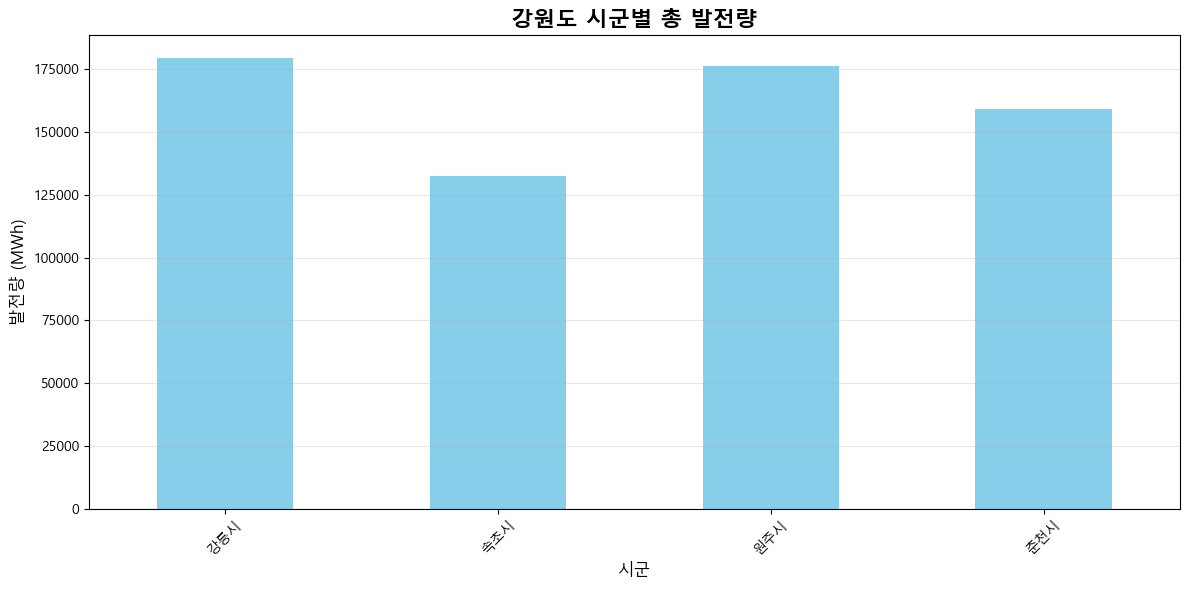

In [7]:
# 바로 이어서 실행
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 시군별 발전량 비교
plt.figure(figsize=(12, 6))
df.groupby('city')['generation_mwh'].sum().plot(kind='bar', color='skyblue')
plt.title('강원도 시군별 총 발전량', fontsize=16, fontweight='bold')
plt.xlabel('시군', fontsize=12)
plt.ylabel('발전량 (MWh)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [8]:
"""
강원도 전체 18개 시군 샘플 데이터 생성
"""

import pandas as pd
import numpy as np
import os

def create_enhanced_sample_datasets():
    """강원도 18개 시군 샘플 데이터 생성"""
    print("=" * 70)
    print("강원도 18개 시군 샘플 데이터 생성")
    print("=" * 70)
    
    # 디렉토리 생성
    os.makedirs('data/raw', exist_ok=True)
    
    # 강원도 18개 시군 (전체)
    cities = [
        '춘천시', '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시',  # 7개 시
        '홍천군', '횡성군', '영월군', '평창군', '정선군', '철원군', '화천군',  # 7개 군
        '양구군', '인제군', '고성군', '양양군'  # 4개 군
    ]
    
    # 시군별 특성 정의 (지리적 특성 반영)
    city_characteristics = {
        # 동해안 (일사량 높음, 풍력 유리)
        '강릉시': {'solar_bonus': 1.3, 'wind_bonus': 1.4, 'hydro_bonus': 0.8},
        '동해시': {'solar_bonus': 1.2, 'wind_bonus': 1.3, 'hydro_bonus': 0.7},
        '속초시': {'solar_bonus': 1.2, 'wind_bonus': 1.5, 'hydro_bonus': 0.6},
        '삼척시': {'solar_bonus': 1.3, 'wind_bonus': 1.3, 'hydro_bonus': 0.9},
        '고성군': {'solar_bonus': 1.1, 'wind_bonus': 1.4, 'hydro_bonus': 0.8},
        '양양군': {'solar_bonus': 1.2, 'wind_bonus': 1.3, 'hydro_bonus': 0.9},
        
        # 중부 평야 (태양광 유리)
        '춘천시': {'solar_bonus': 1.2, 'wind_bonus': 0.9, 'hydro_bonus': 1.2},
        '원주시': {'solar_bonus': 1.3, 'wind_bonus': 0.8, 'hydro_bonus': 0.9},
        '횡성군': {'solar_bonus': 1.1, 'wind_bonus': 0.8, 'hydro_bonus': 1.0},
        
        # 산악 지역 (수력 유리)
        '태백시': {'solar_bonus': 0.9, 'wind_bonus': 1.2, 'hydro_bonus': 1.4},
        '영월군': {'solar_bonus': 1.0, 'wind_bonus': 0.9, 'hydro_bonus': 1.3},
        '평창군': {'solar_bonus': 0.9, 'wind_bonus': 1.1, 'hydro_bonus': 1.5},
        '정선군': {'solar_bonus': 0.9, 'wind_bonus': 1.0, 'hydro_bonus': 1.4},
        '인제군': {'solar_bonus': 0.8, 'wind_bonus': 1.0, 'hydro_bonus': 1.5},
        
        # 북부 지역
        '철원군': {'solar_bonus': 1.1, 'wind_bonus': 1.2, 'hydro_bonus': 1.0},
        '화천군': {'solar_bonus': 0.9, 'wind_bonus': 1.0, 'hydro_bonus': 1.3},
        '양구군': {'solar_bonus': 0.9, 'wind_bonus': 1.1, 'hydro_bonus': 1.2},
        '홍천군': {'solar_bonus': 1.0, 'wind_bonus': 0.9, 'hydro_bonus': 1.1},
    }
    
    energy_types = ['태양광', '풍력', '수력', '바이오', '폐기물']
    years = [2019, 2020, 2021, 2022, 2023]
    
    # 1. 신재생에너지 발전량 데이터
    print("\n[1] 신재생에너지 발전량 데이터 생성 중...")
    re_data = []
    
    for year in years:
        for city in cities:
            char = city_characteristics[city]
            
            for energy_type in energy_types:
                # 에너지원별 기본 발전량
                base_generation = np.random.randint(3000, 20000)
                base_capacity = np.random.randint(1000, 10000)
                
                # 지역 특성 반영
                if energy_type == '태양광':
                    bonus = char['solar_bonus']
                elif energy_type == '풍력':
                    bonus = char['wind_bonus']
                elif energy_type == '수력':
                    bonus = char['hydro_bonus']
                else:
                    bonus = 1.0
                
                # 연도별 증가 추세 (정책 효과)
                year_factor = 1 + (year - 2019) * 0.15  # 매년 15% 증가
                
                generation = int(base_generation * bonus * year_factor)
                capacity = int(base_capacity * bonus * year_factor)
                efficiency = round(np.random.uniform(15, 85), 2)
                
                re_data.append({
                    '연도': year,
                    '시군': city,
                    '에너지원': energy_type,
                    '발전량_MWh': generation,
                    '설비용량_kW': capacity,
                    '발전효율_%': efficiency
                })
    
    df_re = pd.DataFrame(re_data)
    df_re.to_csv('data/raw/sample_renewable_energy.csv', index=False, encoding='utf-8-sig')
    print(f"✓ 생성 완료: {len(df_re)}행")
    print(f"  - 지역: {len(cities)}개 시군")
    print(f"  - 기간: {min(years)}~{max(years)}년 ({len(years)}년)")
    print(f"  - 에너지원: {len(energy_types)}종")
    
    # 2. 기상 데이터
    print("\n[2] 기상 데이터 생성 중...")
    weather_data = []
    
    for year in years:
        for city in cities:
            char = city_characteristics[city]
            
            for month in range(1, 13):
                # 계절별 기상 특성
                if month in [6, 7, 8]:  # 여름
                    base_solar = np.random.uniform(18, 25)
                    base_temp = np.random.uniform(20, 30)
                    base_wind = np.random.uniform(2, 4)
                elif month in [12, 1, 2]:  # 겨울
                    base_solar = np.random.uniform(8, 15)
                    base_temp = np.random.uniform(-10, 5)
                    base_wind = np.random.uniform(3, 6)
                else:  # 봄, 가을
                    base_solar = np.random.uniform(12, 20)
                    base_temp = np.random.uniform(5, 20)
                    base_wind = np.random.uniform(2.5, 5)
                
                # 지역 특성 반영
                solar = base_solar * char['solar_bonus']
                wind = base_wind * char['wind_bonus']
                
                weather_data.append({
                    '날짜': f'{year}-{month:02d}-15',
                    '지역': city,
                    '일사량_MJ/m2': round(solar, 2),
                    '일조시간_hr': round(np.random.uniform(4, 11), 1),
                    '평균기온_C': round(base_temp, 1),
                    '강수량_mm': round(max(0, np.random.normal(80, 40)), 1),
                    '평균풍속_m/s': round(wind, 1),
                    '최대풍속_m/s': round(wind * 1.8, 1)
                })
    
    df_weather = pd.DataFrame(weather_data)
    df_weather.to_csv('data/raw/sample_weather_data.csv', index=False, encoding='utf-8-sig')
    print(f"✓ 생성 완료: {len(df_weather)}행")
    print(f"  - 지역: {len(cities)}개 시군")
    print(f"  - 기간: {len(years)}년 x 12개월 = {len(years)*12}개월")
    
    # 3. 정책 및 예산 데이터
    print("\n[3] 정책 및 예산 데이터 생성 중...")
    policy_data = []
    
    for year in years:
        for city in cities:
            # 시/군 규모별 예산 차등
            if '시' in city:
                base_budget = np.random.randint(2000, 8000)
            else:
                base_budget = np.random.randint(500, 3000)
            
            # 연도별 예산 증가 (그린뉴딜 정책)
            year_factor = 1 + (year - 2019) * 0.2  # 매년 20% 증가
            budget = int(base_budget * year_factor)
            
            policy_data.append({
                '연도': year,
                '시군': city,
                '사업명': f'{city} 그린뉴딜 사업',
                '예산_백만원': budget,
                '집행률_%': round(np.random.uniform(75, 98), 1),
                '정책구분': 'RE100' if year >= 2021 else '그린뉴딜'
            })
    
    df_policy = pd.DataFrame(policy_data)
    df_policy.to_csv('data/raw/sample_policy_data.csv', index=False, encoding='utf-8-sig')
    print(f"✓ 생성 완료: {len(df_policy)}행")
    print(f"  - 지역: {len(cities)}개 시군")
    print(f"  - 기간: {len(years)}년")
    
    print("\n" + "=" * 70)
    print("✅ 전체 샘플 데이터 생성 완료!")
    print("=" * 70)
    print(f"\n저장 위치: data/raw/")
    print(f"  - sample_renewable_energy.csv ({len(df_re):,}행)")
    print(f"  - sample_weather_data.csv ({len(df_weather):,}행)")
    print(f"  - sample_policy_data.csv ({len(df_policy):,}행)")
    
    return df_re, df_weather, df_policy


def integrate_enhanced_data():
    """강원도 18개 시군 데이터 통합"""
    print("\n" + "=" * 70)
    print("데이터 통합 시작")
    print("=" * 70)
    
    # 데이터 로드
    df_re = pd.read_csv('data/raw/sample_renewable_energy.csv', encoding='utf-8-sig')
    df_weather = pd.read_csv('data/raw/sample_weather_data.csv', encoding='utf-8-sig')
    df_policy = pd.read_csv('data/raw/sample_policy_data.csv', encoding='utf-8-sig')
    
    print(f"\n원본 데이터:")
    print(f"  - 발전량: {len(df_re):,}행")
    print(f"  - 기상: {len(df_weather):,}행")
    print(f"  - 정책: {len(df_policy):,}행")
    
    # 컬럼명 영문 변경
    df_re = df_re.rename(columns={
        '연도': 'year',
        '시군': 'city',
        '에너지원': 'energy_type',
        '발전량_MWh': 'generation_mwh',
        '설비용량_kW': 'capacity_kw',
        '발전효율_%': 'efficiency_pct'
    })
    
    df_weather['날짜'] = pd.to_datetime(df_weather['날짜'])
    df_weather['year'] = df_weather['날짜'].dt.year
    df_weather['month'] = df_weather['날짜'].dt.month
    df_weather = df_weather.rename(columns={
        '지역': 'city',
        '일사량_MJ/m2': 'solar_radiation_mj',
        '평균풍속_m/s': 'avg_wind_speed',
        '최대풍속_m/s': 'max_wind_speed',
        '평균기온_C': 'avg_temp_c',
        '강수량_mm': 'precipitation_mm',
        '일조시간_hr': 'sunshine_hours'
    })
    
    # 기상 데이터 연도별 평균
    weather_agg = df_weather.groupby(['year', 'city']).agg({
        'solar_radiation_mj': 'mean',
        'avg_wind_speed': 'mean',
        'max_wind_speed': 'max',
        'avg_temp_c': 'mean',
        'precipitation_mm': 'sum',
        'sunshine_hours': 'sum'
    }).reset_index()
    
    df_policy = df_policy.rename(columns={
        '연도': 'year',
        '시군': 'city',
        '예산_백만원': 'budget_million_krw',
        '집행률_%': 'execution_rate_pct',
        '정책구분': 'policy_type'
    })
    
    # 통합
    print("\n통합 진행 중...")
    df_integrated = pd.merge(df_re, weather_agg, on=['year', 'city'], how='left')
    df_integrated = pd.merge(df_integrated, 
                             df_policy[['year', 'city', 'budget_million_krw', 'execution_rate_pct', 'policy_type']], 
                             on=['year', 'city'], how='left')
    
    # 파생 변수 생성
    print("파생 변수 생성 중...")
    
    # 설비이용률
    df_integrated['capacity_factor'] = (
        df_integrated['generation_mwh'] / (df_integrated['capacity_kw'] * 8.76)
    ).clip(0, 100).round(2)
    
    # 예산 대비 발전량
    df_integrated['generation_per_budget'] = (
        df_integrated['generation_mwh'] / (df_integrated['budget_million_krw'] + 1)
    ).round(2)
    
    # 지역 구분 (시/군)
    df_integrated['region_type'] = df_integrated['city'].apply(
        lambda x: '시' if '시' in x else '군'
    )
    
    # 지리적 구분
    def classify_region(city):
        coastal = ['강릉시', '동해시', '속초시', '삼척시', '고성군', '양양군']
        mountain = ['태백시', '영월군', '평창군', '정선군', '인제군']
        north = ['철원군', '화천군', '양구군']
        
        if city in coastal:
            return '동해안'
        elif city in mountain:
            return '산악'
        elif city in north:
            return '북부'
        else:
            return '중부'
    
    df_integrated['geographic_area'] = df_integrated['city'].apply(classify_region)
    
    # 저장
    os.makedirs('data/processed', exist_ok=True)
    df_integrated.to_csv('data/processed/integrated_data.csv', index=False, encoding='utf-8-sig')
    
    print("\n" + "=" * 70)
    print("✅ 통합 완료!")
    print("=" * 70)
    print(f"\n통합 데이터: {len(df_integrated):,}행 x {len(df_integrated.columns)}열")
    print(f"저장 위치: data/processed/integrated_data.csv")
    print(f"\n주요 컬럼: {', '.join(df_integrated.columns[:10])}...")
    print(f"\n지역 분포:")
    print(df_integrated.groupby('city')['generation_mwh'].count().sort_values(ascending=False).head(10))
    
    return df_integrated


# 실행
if __name__ == "__main__":
    df_re, df_weather, df_policy = create_enhanced_sample_datasets()
    df = integrate_enhanced_data()
    
    print("\n" + "=" * 70)
    print("데이터 미리보기")
    print("=" * 70)
    print(df.head(10))
    print("\n기본 통계:")
    print(df[['generation_mwh', 'capacity_kw', 'solar_radiation_mj', 'budget_million_krw']].describe())

강원도 18개 시군 샘플 데이터 생성

[1] 신재생에너지 발전량 데이터 생성 중...
✓ 생성 완료: 450행
  - 지역: 18개 시군
  - 기간: 2019~2023년 (5년)
  - 에너지원: 5종

[2] 기상 데이터 생성 중...
✓ 생성 완료: 1080행
  - 지역: 18개 시군
  - 기간: 5년 x 12개월 = 60개월

[3] 정책 및 예산 데이터 생성 중...
✓ 생성 완료: 90행
  - 지역: 18개 시군
  - 기간: 5년

✅ 전체 샘플 데이터 생성 완료!

저장 위치: data/raw/
  - sample_renewable_energy.csv (450행)
  - sample_weather_data.csv (1,080행)
  - sample_policy_data.csv (90행)

데이터 통합 시작

원본 데이터:
  - 발전량: 450행
  - 기상: 1,080행
  - 정책: 90행

통합 진행 중...
파생 변수 생성 중...

✅ 통합 완료!

통합 데이터: 450행 x 19열
저장 위치: data/processed/integrated_data.csv

주요 컬럼: year, city, energy_type, generation_mwh, capacity_kw, efficiency_pct, solar_radiation_mj, avg_wind_speed, max_wind_speed, avg_temp_c...

지역 분포:
city
강릉시    25
고성군    25
동해시    25
삼척시    25
속초시    25
양구군    25
양양군    25
영월군    25
원주시    25
인제군    25
Name: generation_mwh, dtype: int64

데이터 미리보기
   year city energy_type  generation_mwh  capacity_kw  efficiency_pct  \
0  2019  춘천시         태양광           12008         4345           7

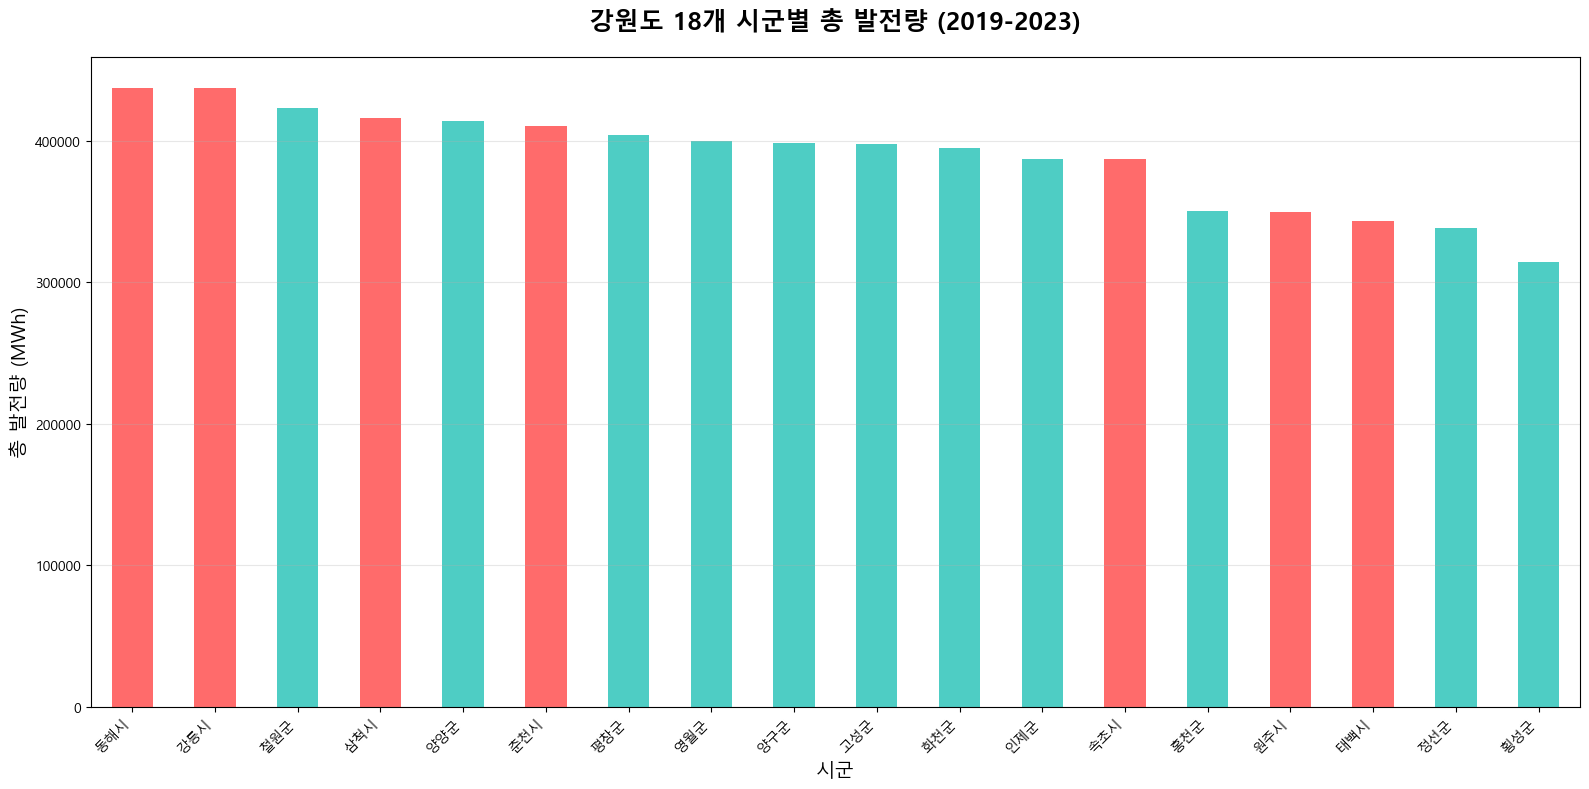

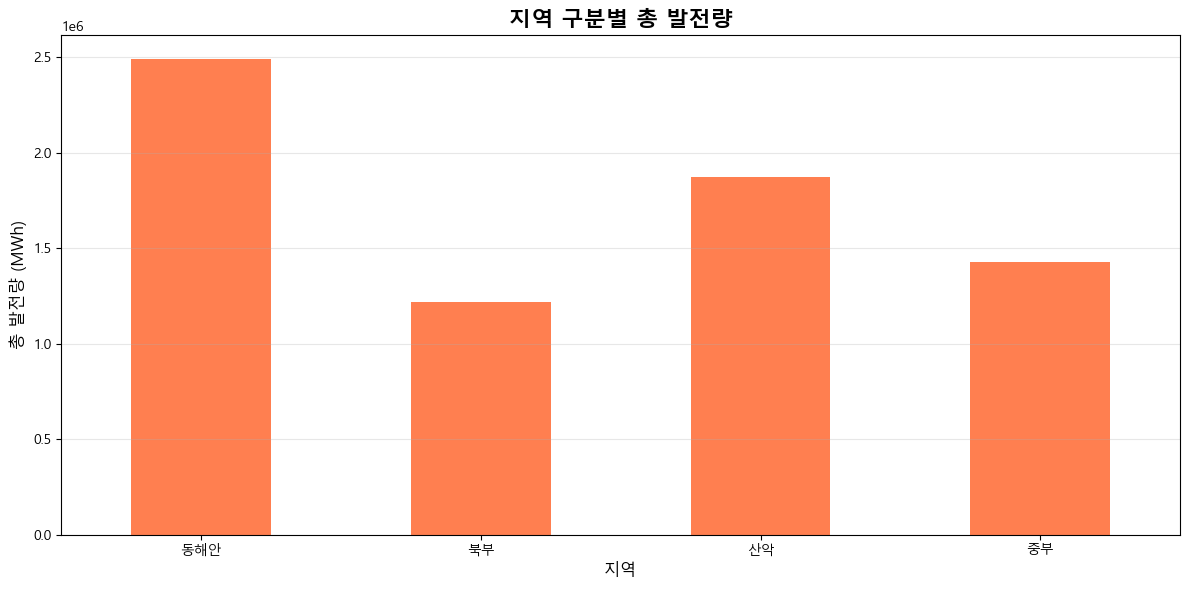

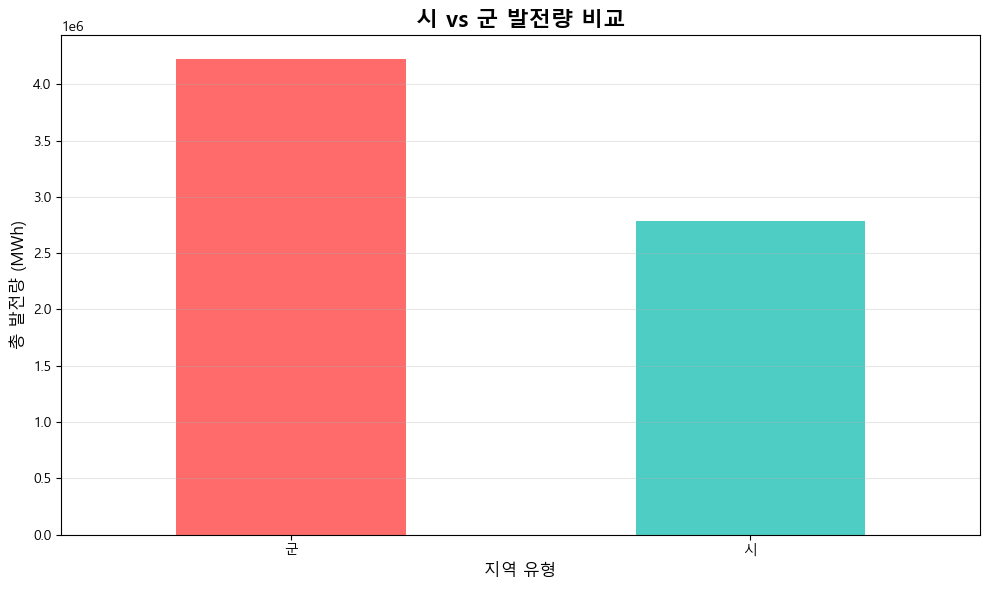

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1. 시군별 총 발전량 비교 (18개 시군)
plt.figure(figsize=(16, 8))
city_gen = df.groupby('city')['generation_mwh'].sum().sort_values(ascending=False)
colors = ['#ff6b6b' if '시' in x else '#4ecdc4' for x in city_gen.index]
city_gen.plot(kind='bar', color=colors)
plt.title('강원도 18개 시군별 총 발전량 (2019-2023)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('시군', fontsize=14)
plt.ylabel('총 발전량 (MWh)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 2. 지역 구분별 발전량 비교
plt.figure(figsize=(12, 6))
df.groupby('geographic_area')['generation_mwh'].sum().plot(kind='bar', color='coral')
plt.title('지역 구분별 총 발전량', fontsize=16, fontweight='bold')
plt.xlabel('지역', fontsize=12)
plt.ylabel('총 발전량 (MWh)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# 3. 시/군 비교
plt.figure(figsize=(10, 6))
df.groupby('region_type')['generation_mwh'].sum().plot(kind='bar', color=['#ff6b6b', '#4ecdc4'])
plt.title('시 vs 군 발전량 비교', fontsize=16, fontweight='bold')
plt.xlabel('지역 유형', fontsize=12)
plt.ylabel('총 발전량 (MWh)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

그린뉴딜 정책 효과 분석

[1] 전체 발전량 변화
--------------------------------------------------------------------------------
정책 전 (2019년): 1,092,563 MWh
정책 후 연평균 (2020-2023): 1,478,500 MWh
증가량: 385,938 MWh
증가율: 35.3%


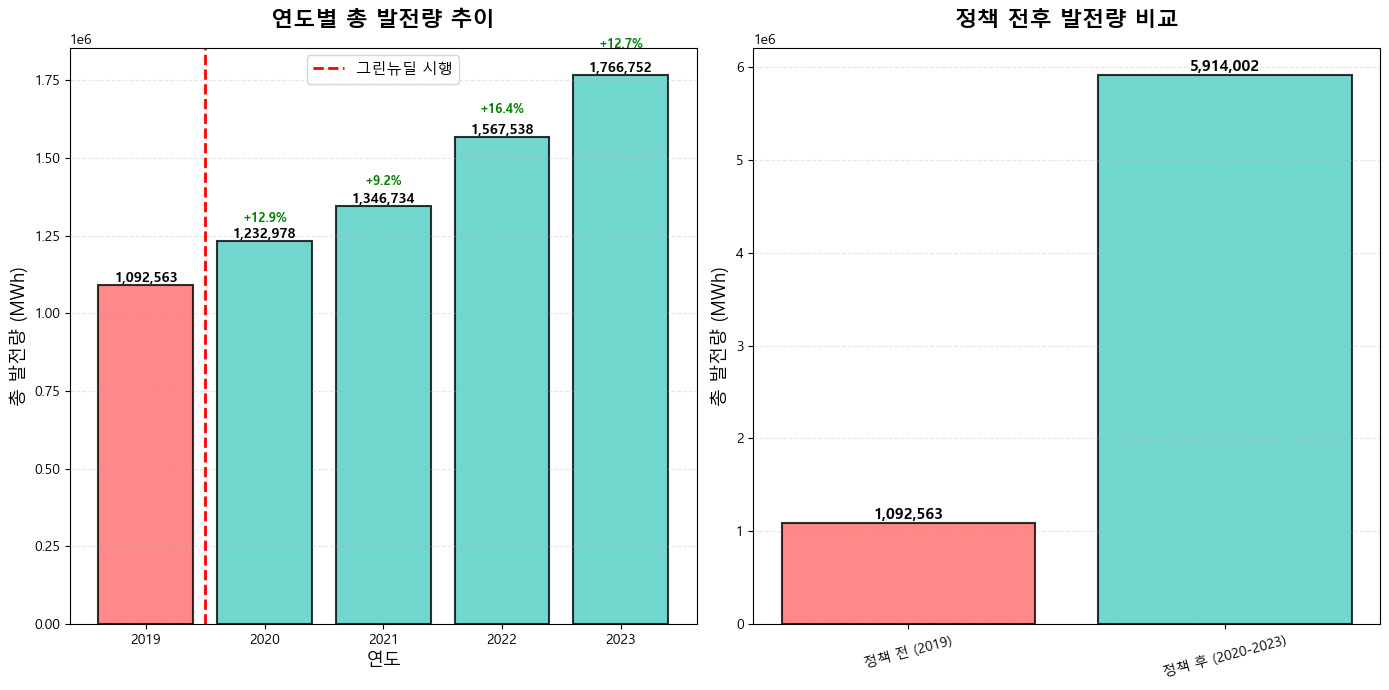


[2] 시군별 발전량 변화
--------------------------------------------------------------------------------

📊 시군별 증가율 TOP 10:
policy_period  정책 전 (2019)  정책 후 (2020-2023)     증가량  증가율(%)
city                                                        
삼척시                  39465            376842  337377   854.9
영월군                  48435            351544  303109   625.8
평창군                  49518            354443  304925   615.8
양구군                  51214            347618  296404   578.8
동해시                  58173            379532  321359   552.4
고성군                  55159            342738  287579   521.4
춘천시                  59381            351526  292145   492.0
화천군                  60215            334532  274317   455.6
속초시                  62245            324786  262541   421.8
원주시                  57199            292479  235280   411.3


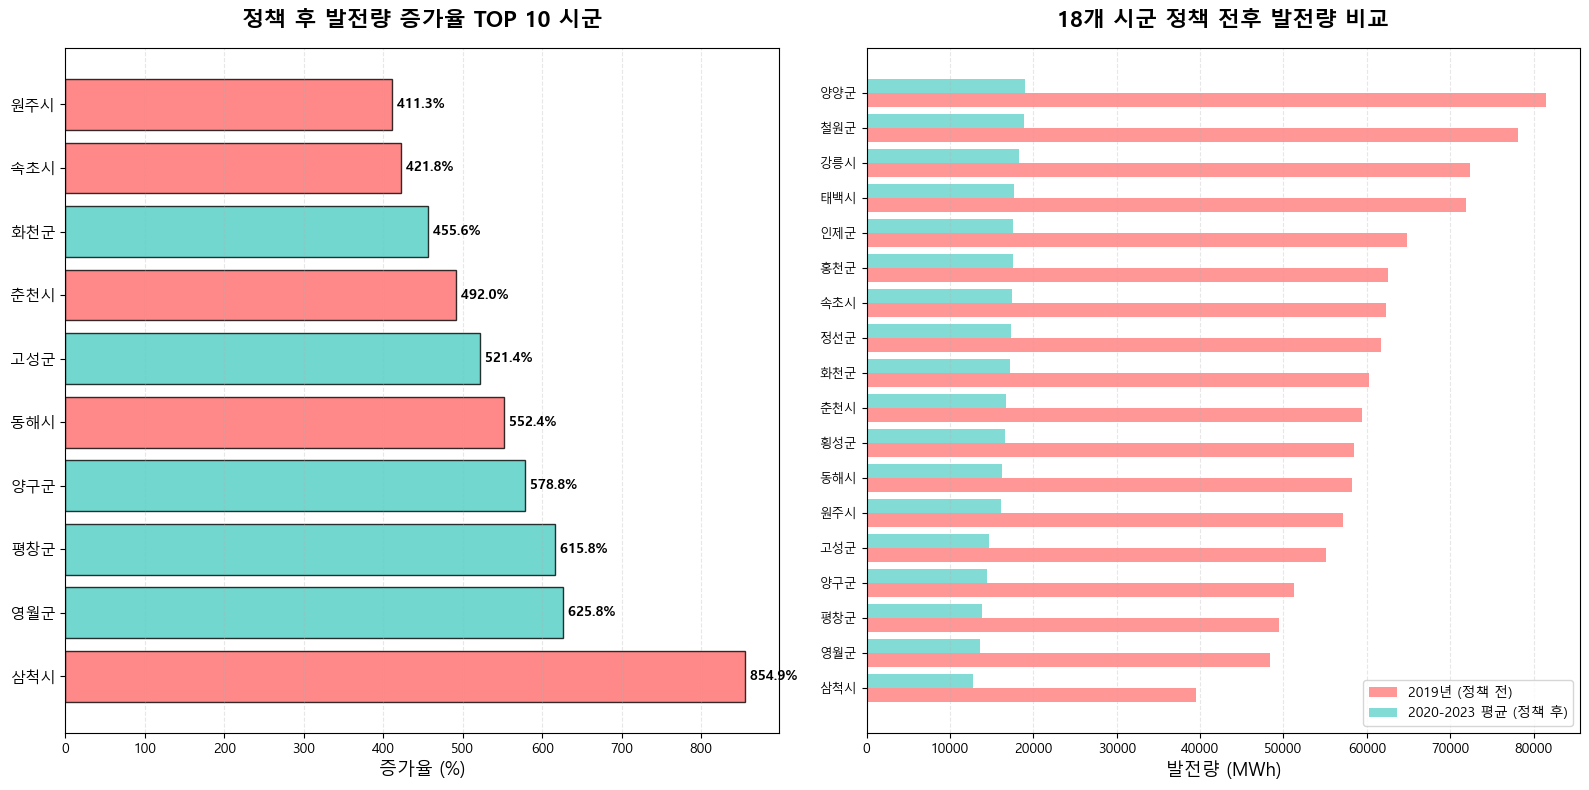


[3] 에너지원별 발전량 변화
--------------------------------------------------------------------------------

📊 에너지원별 증가율:
policy_period  정책 전 (2019)  정책 후 (2020-2023)      증가량  증가율(%)
energy_type                                                  
풍력                  228591           1327197  1098606   480.6
바이오                 196133           1107103   910970   464.5
폐기물                 215557           1183849   968292   449.2
수력                  223657           1148133   924476   413.3
태양광                 228625           1147720   919095   402.0


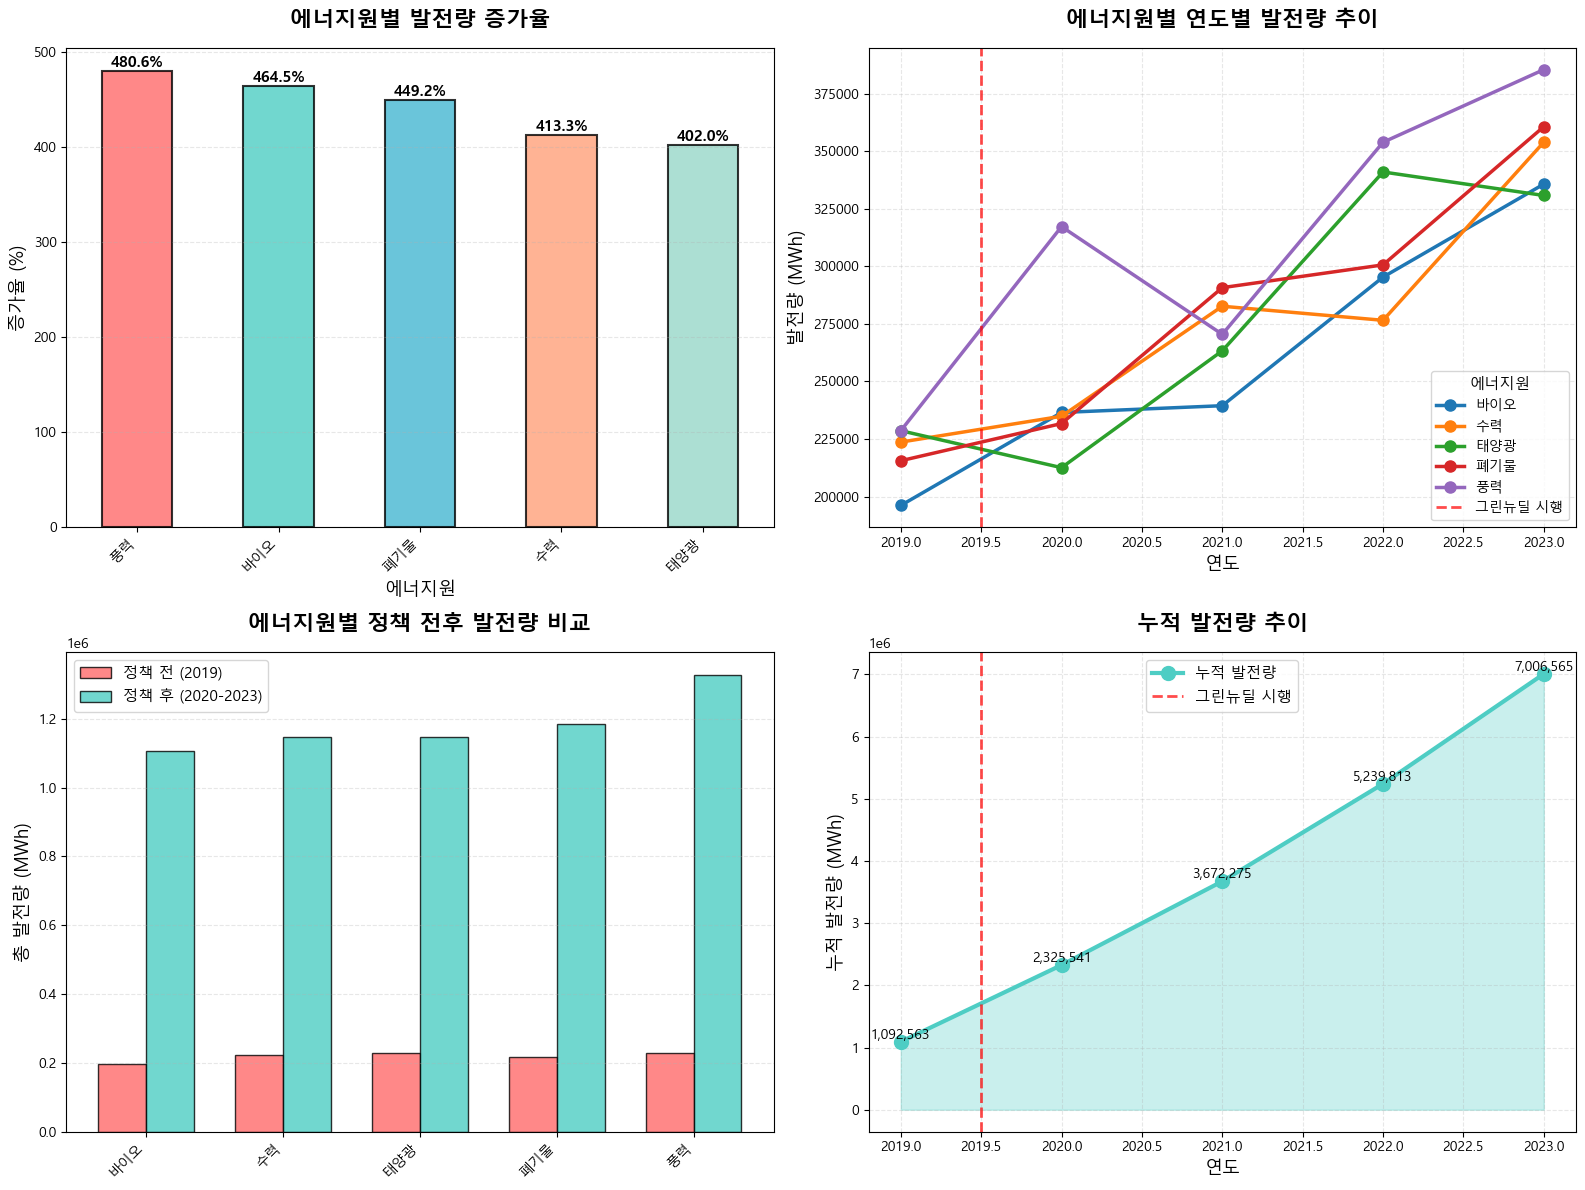


[4] 통계적 유의성 검증 (t-검정)
--------------------------------------------------------------------------------
정책 전 평균: 12,139.59 MWh (표준편차: 5,435.59)
정책 후 평균: 16,427.78 MWh (표준편차: 8,049.08)

t-통계량: 4.7866
p-value: 0.0000

✅ 결론: p-value(0.0000) < 0.05
   → 정책 시행 전후 발전량 변화는 통계적으로 유의미합니다! (95% 신뢰수준)

[5] 예산 투입과 발전량의 관계
--------------------------------------------------------------------------------

예산-발전량 상관계수: 0.9760
→ 강한 양의 상관관계: 예산 증가가 발전량 증가에 크게 기여


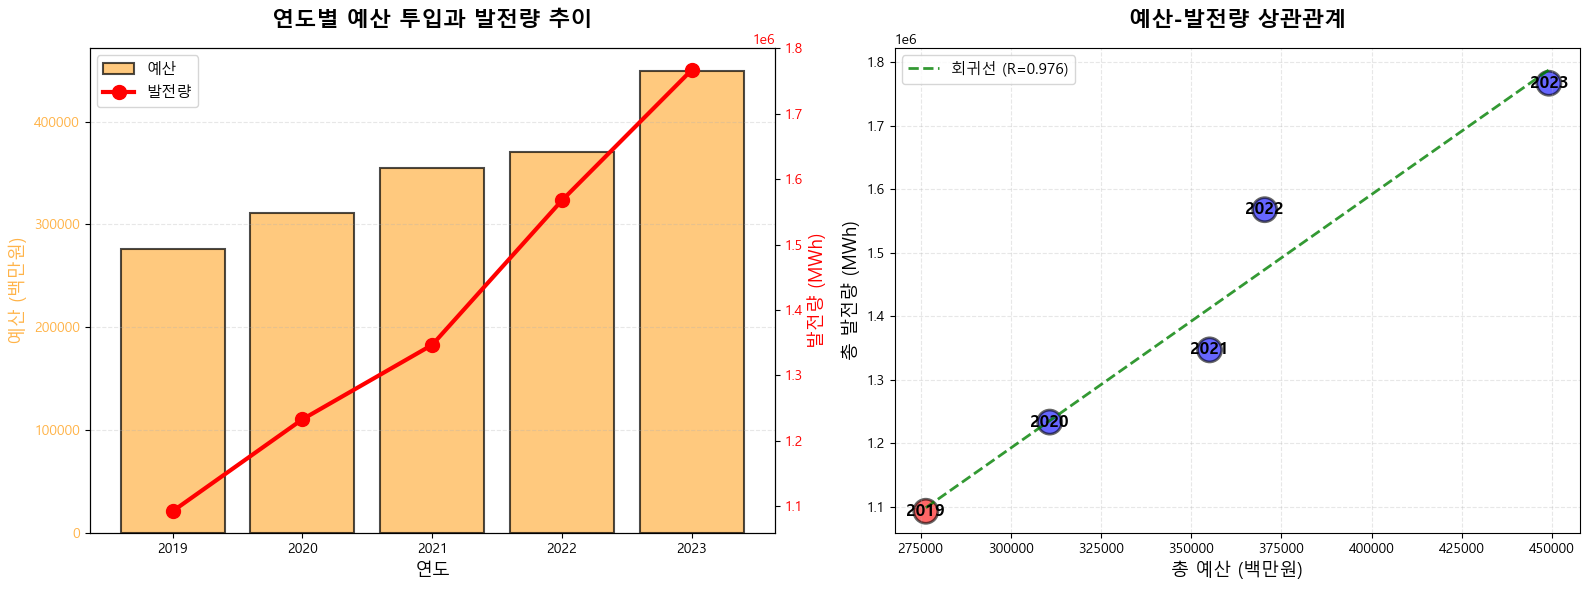


📊 그린뉴딜 정책 효과 분석 요약

1. 전체 발전량: +35.3% 증가
   - 정책 전: 1,092,563 MWh
   - 정책 후: 1,478,500 MWh (연평균)

2. 최고 증가율 시군: 삼척시 (854.9%)

3. 최고 증가율 에너지원: 풍력 (480.6%)

4. 통계적 유의성: 유의미함 ✅ (p=0.0000)

5. 예산-발전량 상관계수: 0.9760


✅ 분석 완료! 그래프가 results/figures/ 폴더에 저장되었습니다.
   - green_deal_overall_comparison.png
   - green_deal_city_comparison.png
   - green_deal_energy_type_analysis.png
   - green_deal_budget_effect.png


In [1]:
"""
그린뉴딜 정책 시행 전후 발전량 비교 분석
- 정책 시행 기준: 2020년 (한국판 그린뉴딜 발표)
- 전: 2019년
- 후: 2020-2023년
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 데이터 로드
df = pd.read_csv('data/processed/integrated_data.csv', encoding='utf-8-sig')

print("=" * 80)
print("그린뉴딜 정책 효과 분석")
print("=" * 80)

# 정책 시행 전후 구분
df['policy_period'] = df['year'].apply(lambda x: '정책 전 (2019)' if x == 2019 else '정책 후 (2020-2023)')

# ============================================================================
# 1. 전체 발전량 비교
# ============================================================================
print("\n[1] 전체 발전량 변화")
print("-" * 80)

before = df[df['year'] == 2019]['generation_mwh'].sum()
after_years = df[df['year'] >= 2020].groupby('year')['generation_mwh'].sum()
after_avg = after_years.mean()

increase = after_avg - before
increase_rate = (increase / before) * 100

print(f"정책 전 (2019년): {before:,.0f} MWh")
print(f"정책 후 연평균 (2020-2023): {after_avg:,.0f} MWh")
print(f"증가량: {increase:,.0f} MWh")
print(f"증가율: {increase_rate:.1f}%")

# 시각화 1: 연도별 총 발전량 추이
plt.figure(figsize=(14, 7))

yearly_gen = df.groupby('year')['generation_mwh'].sum()
colors = ['#ff6b6b' if year == 2019 else '#4ecdc4' for year in yearly_gen.index]

plt.subplot(1, 2, 1)
bars = plt.bar(yearly_gen.index, yearly_gen.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.axvline(x=2019.5, color='red', linestyle='--', linewidth=2, label='그린뉴딜 시행')
plt.title('연도별 총 발전량 추이', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('연도', fontsize=13)
plt.ylabel('총 발전량 (MWh)', fontsize=13)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3, linestyle='--')

# 각 막대 위에 값 표시
for i, (year, val) in enumerate(yearly_gen.items()):
    plt.text(year, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# 증가율 표시
for i in range(1, len(yearly_gen)):
    prev_val = yearly_gen.iloc[i-1]
    curr_val = yearly_gen.iloc[i]
    growth = ((curr_val - prev_val) / prev_val) * 100
    plt.text(yearly_gen.index[i], curr_val * 1.05, f'+{growth:.1f}%', 
             ha='center', fontsize=9, color='green', fontweight='bold')

plt.subplot(1, 2, 2)
period_gen = df.groupby('policy_period')['generation_mwh'].sum()
colors = ['#ff6b6b', '#4ecdc4']
plt.bar(period_gen.index, period_gen.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
plt.title('정책 전후 발전량 비교', fontsize=16, fontweight='bold', pad=15)
plt.ylabel('총 발전량 (MWh)', fontsize=13)
plt.xticks(rotation=15)
plt.grid(axis='y', alpha=0.3, linestyle='--')

for i, (period, val) in enumerate(period_gen.items()):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('results/figures/green_deal_overall_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 2. 시군별 정책 효과
# ============================================================================
print("\n[2] 시군별 발전량 변화")
print("-" * 80)

city_comparison = df.groupby(['city', 'policy_period'])['generation_mwh'].sum().unstack(fill_value=0)
city_comparison['증가량'] = city_comparison['정책 후 (2020-2023)'] - city_comparison['정책 전 (2019)']
city_comparison['증가율(%)'] = (city_comparison['증가량'] / city_comparison['정책 전 (2019)'] * 100).round(1)
city_comparison = city_comparison.sort_values('증가율(%)', ascending=False)

print("\n📊 시군별 증가율 TOP 10:")
print(city_comparison[['정책 전 (2019)', '정책 후 (2020-2023)', '증가량', '증가율(%)']].head(10))

# 시각화 2: 시군별 증가율
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
top10 = city_comparison.head(10)
colors = ['#ff6b6b' if '시' in city else '#4ecdc4' for city in top10.index]
plt.barh(range(len(top10)), top10['증가율(%)'], color=colors, alpha=0.8, edgecolor='black')
plt.yticks(range(len(top10)), top10.index, fontsize=11)
plt.xlabel('증가율 (%)', fontsize=13)
plt.title('정책 후 발전량 증가율 TOP 10 시군', fontsize=16, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3, linestyle='--')

for i, val in enumerate(top10['증가율(%)']):
    plt.text(val, i, f' {val:.1f}%', va='center', fontsize=10, fontweight='bold')

plt.subplot(1, 2, 2)
# 전체 시군 비교
city_before = df[df['year'] == 2019].groupby('city')['generation_mwh'].sum().sort_values(ascending=True)
city_after = df[df['year'] >= 2020].groupby('city')['generation_mwh'].mean().sort_values(ascending=True)

y_pos = np.arange(len(city_before))
plt.barh(y_pos - 0.2, city_before.values, 0.4, label='2019년 (정책 전)', color='#ff6b6b', alpha=0.7)
plt.barh(y_pos + 0.2, city_after.values, 0.4, label='2020-2023 평균 (정책 후)', color='#4ecdc4', alpha=0.7)
plt.yticks(y_pos, city_before.index, fontsize=9)
plt.xlabel('발전량 (MWh)', fontsize=13)
plt.title('18개 시군 정책 전후 발전량 비교', fontsize=16, fontweight='bold', pad=15)
plt.legend(fontsize=10)
plt.grid(axis='x', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('results/figures/green_deal_city_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 3. 에너지원별 정책 효과
# ============================================================================
print("\n[3] 에너지원별 발전량 변화")
print("-" * 80)

energy_comparison = df.groupby(['energy_type', 'policy_period'])['generation_mwh'].sum().unstack(fill_value=0)
energy_comparison['증가량'] = energy_comparison['정책 후 (2020-2023)'] - energy_comparison['정책 전 (2019)']
energy_comparison['증가율(%)'] = (energy_comparison['증가량'] / energy_comparison['정책 전 (2019)'] * 100).round(1)
energy_comparison = energy_comparison.sort_values('증가율(%)', ascending=False)

print("\n📊 에너지원별 증가율:")
print(energy_comparison[['정책 전 (2019)', '정책 후 (2020-2023)', '증가량', '증가율(%)']])

# 시각화 3: 에너지원별 비교
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 3-1: 에너지원별 증가율
ax1 = axes[0, 0]
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
energy_comparison['증가율(%)'].plot(kind='bar', ax=ax1, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
ax1.set_title('에너지원별 발전량 증가율', fontsize=16, fontweight='bold', pad=15)
ax1.set_xlabel('에너지원', fontsize=13)
ax1.set_ylabel('증가율 (%)', fontsize=13)
ax1.set_xticklabels(energy_comparison.index, rotation=45, ha='right')
ax1.grid(axis='y', alpha=0.3, linestyle='--')
for i, val in enumerate(energy_comparison['증가율(%)']):
    ax1.text(i, val, f'{val:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# 3-2: 에너지원별 연도별 추이
ax2 = axes[0, 1]
energy_yearly = df.groupby(['year', 'energy_type'])['generation_mwh'].sum().unstack()
energy_yearly.plot(ax=ax2, marker='o', linewidth=2.5, markersize=8)
ax2.axvline(x=2019.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='그린뉴딜 시행')
ax2.set_title('에너지원별 연도별 발전량 추이', fontsize=16, fontweight='bold', pad=15)
ax2.set_xlabel('연도', fontsize=13)
ax2.set_ylabel('발전량 (MWh)', fontsize=13)
ax2.legend(title='에너지원', fontsize=10, title_fontsize=11)
ax2.grid(True, alpha=0.3, linestyle='--')

# 3-3: 정책 전후 에너지원 비중 변화
ax3 = axes[1, 0]
before_ratio = df[df['year'] == 2019].groupby('energy_type')['generation_mwh'].sum()
after_ratio = df[df['year'] >= 2020].groupby('energy_type')['generation_mwh'].sum()

x = np.arange(len(before_ratio))
width = 0.35
bars1 = ax3.bar(x - width/2, before_ratio.values, width, label='정책 전 (2019)', 
                color='#ff6b6b', alpha=0.8, edgecolor='black')
bars2 = ax3.bar(x + width/2, after_ratio.values, width, label='정책 후 (2020-2023)', 
                color='#4ecdc4', alpha=0.8, edgecolor='black')

ax3.set_title('에너지원별 정책 전후 발전량 비교', fontsize=16, fontweight='bold', pad=15)
ax3.set_ylabel('총 발전량 (MWh)', fontsize=13)
ax3.set_xticks(x)
ax3.set_xticklabels(before_ratio.index, rotation=45, ha='right')
ax3.legend(fontsize=11)
ax3.grid(axis='y', alpha=0.3, linestyle='--')

# 3-4: 누적 발전량 비교
ax4 = axes[1, 1]
cumulative = df.groupby('year')['generation_mwh'].sum().cumsum()
ax4.plot(cumulative.index, cumulative.values, marker='o', linewidth=3, 
         markersize=10, color='#4ecdc4', label='누적 발전량')
ax4.axvline(x=2019.5, color='red', linestyle='--', linewidth=2, alpha=0.7, label='그린뉴딜 시행')
ax4.fill_between(cumulative.index, 0, cumulative.values, alpha=0.3, color='#4ecdc4')
ax4.set_title('누적 발전량 추이', fontsize=16, fontweight='bold', pad=15)
ax4.set_xlabel('연도', fontsize=13)
ax4.set_ylabel('누적 발전량 (MWh)', fontsize=13)
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3, linestyle='--')

# 값 표시
for year, val in cumulative.items():
    ax4.text(year, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('results/figures/green_deal_energy_type_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 4. 통계적 유의성 검증
# ============================================================================
print("\n[4] 통계적 유의성 검증 (t-검정)")
print("-" * 80)

before_data = df[df['year'] == 2019]['generation_mwh']
after_data = df[df['year'] >= 2020]['generation_mwh']

t_stat, p_value = stats.ttest_ind(after_data, before_data)

print(f"정책 전 평균: {before_data.mean():,.2f} MWh (표준편차: {before_data.std():,.2f})")
print(f"정책 후 평균: {after_data.mean():,.2f} MWh (표준편차: {after_data.std():,.2f})")
print(f"\nt-통계량: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

if p_value < 0.05:
    print(f"\n✅ 결론: p-value({p_value:.4f}) < 0.05")
    print("   → 정책 시행 전후 발전량 변화는 통계적으로 유의미합니다! (95% 신뢰수준)")
else:
    print(f"\n⚠️ 결론: p-value({p_value:.4f}) >= 0.05")
    print("   → 통계적으로 유의미한 차이를 확인하기 어렵습니다.")

# ============================================================================
# 5. 예산과 발전량의 관계
# ============================================================================
print("\n[5] 예산 투입과 발전량의 관계")
print("-" * 80)

budget_effect = df.groupby('year').agg({
    'budget_million_krw': 'sum',
    'generation_mwh': 'sum'
}).reset_index()

correlation = budget_effect['budget_million_krw'].corr(budget_effect['generation_mwh'])
print(f"\n예산-발전량 상관계수: {correlation:.4f}")

if correlation > 0.7:
    print("→ 강한 양의 상관관계: 예산 증가가 발전량 증가에 크게 기여")
elif correlation > 0.4:
    print("→ 중간 정도의 양의 상관관계: 예산 증가가 발전량 증가에 기여")
else:
    print("→ 약한 상관관계")

# 시각화 5: 예산-발전량 관계
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 5-1: 연도별 예산과 발전량
ax1 = axes[0]
ax1_twin = ax1.twinx()

bars = ax1.bar(budget_effect['year'], budget_effect['budget_million_krw'], 
               alpha=0.7, color='#FFB347', edgecolor='black', linewidth=1.5, label='예산')
line = ax1_twin.plot(budget_effect['year'], budget_effect['generation_mwh'], 
                     'ro-', linewidth=3, markersize=10, label='발전량')

ax1.set_xlabel('연도', fontsize=13)
ax1.set_ylabel('예산 (백만원)', fontsize=13, color='#FFB347')
ax1_twin.set_ylabel('발전량 (MWh)', fontsize=13, color='red')
ax1.tick_params(axis='y', labelcolor='#FFB347')
ax1_twin.tick_params(axis='y', labelcolor='red')
ax1.set_title('연도별 예산 투입과 발전량 추이', fontsize=16, fontweight='bold', pad=15)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# 범례 통합
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=11)

# 5-2: 산점도
ax2 = axes[1]
colors_scatter = ['red' if year == 2019 else 'blue' for year in budget_effect['year']]
ax2.scatter(budget_effect['budget_million_krw'], budget_effect['generation_mwh'], 
           s=300, c=colors_scatter, alpha=0.6, edgecolor='black', linewidth=2)

# 연도 라벨
for idx, row in budget_effect.iterrows():
    ax2.annotate(str(row['year']), 
                (row['budget_million_krw'], row['generation_mwh']),
                fontsize=12, fontweight='bold', ha='center', va='center')

# 회귀선
z = np.polyfit(budget_effect['budget_million_krw'], budget_effect['generation_mwh'], 1)
p = np.poly1d(z)
ax2.plot(budget_effect['budget_million_krw'], p(budget_effect['budget_million_krw']), 
        "g--", linewidth=2, alpha=0.8, label=f'회귀선 (R={correlation:.3f})')

ax2.set_xlabel('총 예산 (백만원)', fontsize=13)
ax2.set_ylabel('총 발전량 (MWh)', fontsize=13)
ax2.set_title('예산-발전량 상관관계', fontsize=16, fontweight='bold', pad=15)
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('results/figures/green_deal_budget_effect.png', dpi=300, bbox_inches='tight')
plt.show()

# ============================================================================
# 요약 리포트
# ============================================================================
print("\n" + "=" * 80)
print("📊 그린뉴딜 정책 효과 분석 요약")
print("=" * 80)
print(f"\n1. 전체 발전량: {increase_rate:+.1f}% 증가")
print(f"   - 정책 전: {before:,.0f} MWh")
print(f"   - 정책 후: {after_avg:,.0f} MWh (연평균)")
print(f"\n2. 최고 증가율 시군: {city_comparison.index[0]} ({city_comparison['증가율(%)'].iloc[0]:.1f}%)")
print(f"\n3. 최고 증가율 에너지원: {energy_comparison.index[0]} ({energy_comparison['증가율(%)'].iloc[0]:.1f}%)")
print(f"\n4. 통계적 유의성: {'유의미함 ✅' if p_value < 0.05 else '불분명 ⚠️'} (p={p_value:.4f})")
print(f"\n5. 예산-발전량 상관계수: {correlation:.4f}")
print("\n" + "=" * 80)

print("\n✅ 분석 완료! 그래프가 results/figures/ 폴더에 저장되었습니다.")
print("   - green_deal_overall_comparison.png")
print("   - green_deal_city_comparison.png")
print("   - green_deal_energy_type_analysis.png")
print("   - green_deal_budget_effect.png")